In [39]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pat1 = re.compile(r'correlation-model =')

In [3]:
with open("H2.out") as f:
    all_lines = f.readlines()

In [4]:
type(all_lines)

list

In [5]:
for idx, line in enumerate(all_lines):
    if re.match(pat1, line.strip()):
        break
# index of pat1
idx+1, line

(132, '    correlation-model = RSP\n')

In [6]:
parsed_lines = []
parsed_lines.append(all_lines[idx])

                        ## Noting the charge and coordinate info

In [7]:
pat2 = re.compile(r"charge")
pat3 = re.compile(r"}")

In [8]:
for idx, line in enumerate(all_lines):
    if re.match(pat2, line.strip()):
        break

In [9]:
line

'    charge = 1\n'

In [10]:
while not(re.match(pat3, line.strip())):
    parsed_lines.append(line.strip())
    idx +=1
    line  = all_lines[idx]

In [11]:
type(parsed_lines), parsed_lines

(list,
 ['    correlation-model = RSP\n',
  'charge = 1',
  'H          1.5            0            0',
  'H            0            0            0'])

                       ## Noting the Converged SCF results

In [12]:
pat4 = re.compile(r"Converged SCF results:")
pat5 = re.compile(r"---------------------------------------------------------------------------")

In [13]:
for idx, line in enumerate(all_lines):
    if re.match(pat4, line.strip()):
        break

In [14]:
line.strip()

'Converged SCF results:'

In [15]:
okay = line.strip().split()
type(okay), okay

(list, ['Converged', 'SCF', 'results:'])

In [16]:
while not(re.match(pat5, line.strip())):
    parsed_lines.append(line.strip())
    idx += 1
    line = all_lines[idx]
parsed_lines = parsed_lines[:-5]

In [17]:
pat6 = re.compile(r"The Final eigenvalues from the Davidson method")

In [18]:
for idx, line in enumerate(all_lines):
    if re.match(pat6, line.strip()):
        break
idx = idx + 2
parsed_lines.append(all_lines[idx])

                         ## Cleaning the parsed lines

In [19]:
clean_parsing = []
for line in parsed_lines:
    clean_parsing.append(line.strip())

In [20]:
parsed_file = open('london.txt', 'w')
for line in clean_parsing:
    parsed_file.write(f"{line}\n")
parsed_file.close()

                      ## Testing other ways of parsing

#### This parsing is based on searching keywords in certain lines

In [21]:
pat7 = re.compile(r".Total:..")
pat8 = re.compile(r"Root:...")

In [22]:
note_lines = []
# since we have already parsed the g.g. energy in parsed_lines, so lets just search there.
for line in parsed_lines:    
    for match in re.finditer(pat7, line):
        note_lines.append(line)
# note_lines

In [23]:
# lets extract the e.s. energies
for line in all_lines:
    for match in re.finditer(pat8, line):
        note_lines.append(line)
# note_lines

In [24]:
es = []
gs = []
energies = []
for i in range(len(note_lines)):
    splitem = note_lines[i].strip().split()
    #print(splitem)
    if i == 0:
        energies.append(splitem[2])
    else:
        energies.append(splitem[4])

In [31]:
energies = np.array(energies, dtype = 'float')
# energies
# add the energy differences to get the excited state energies 
for i in range(len(energies)-1):
    energies[i+1] += energies[i] 

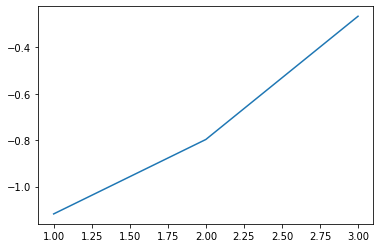

In [42]:
plt.plot(np.arange(1, len(energies)+1), energies)

In [32]:
data = []
for i in range(len(energies)):
    data.append(f"Root{i+1}: {round(energies[i], 5)}")
data

['Root1: -1.11818', 'Root2: -0.79711', 'Root3: -0.26564']

In [33]:
data[0].strip().split()

['Root1:', '-1.11818']

In [35]:
pd_data = []
for i in range(len(data)):
    splitem = data[i].strip().split()
    pd_data.append({"State": splitem[0],
                   "Energy /(eV)": splitem[1]})

In [37]:
# pd_data

In [38]:
# the energies increasing, therefore becoming less stable
pd.DataFrame(pd_data)

,State,Energy /(eV)
0,Root1:,-1.11818
1,Root2:,-0.79711
2,Root3:,-0.26564
